In [3]:
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
# from keras.datasets import mnist
# mnist_data = mnist.load_data()
file = np.load('mnist.npz')
x_train, y_train = file['x_train'], file['y_train']
x_test, y_test = file['x_test'], file['y_test']
file.close()

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

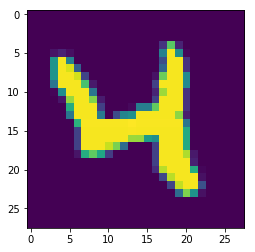

In [10]:
plt.figure()
plt.imshow(x_train[20])

In [8]:
x_train = x_train.reshape((60000,784))
x_test = x_test.reshape((10000,784))

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [10]:
print(x_train[0].shape)
print(x_test[0].shape)

(784,)
(784,)


In [11]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
model = Sequential()
model.add(Dense(100,activation='sigmoid', input_dim=784))
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [17]:
import time
t = time.time()
model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=1, validation_data=(x_test, y_test))
print('Caculation duration : %0.3f' % (time.time()-t) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3335 - acc: 0.9054 - val_loss: 0.3216 - val_acc: 0.9097
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.3302 - acc: 0.9062 - val_loss: 0.3190 - val_acc: 0.9102
Epoch 3/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.3272 - acc: 0.9069 - val_loss: 0.3159 - val_acc: 0.9112
Epoch 4/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.3242 - acc: 0.9081 - val_loss: 0.3130 - val_acc: 0.9132
Epoch 5/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.3214 - acc: 0.9086 - val_loss: 0.3105 - val_acc: 0.9132
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.3186 - acc: 0.9092 - val_loss: 0.3082 - val_acc: 0.9135
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.3160 - acc: 0.9100 - val_loss: 0.3056 - val_acc

In [18]:
score = model.evaluate(x_test, y_test)
print(score)

10000/10000 [==============================] - 1s 74us/step
[0.27994483372569084, 0.9216]


In [19]:
y_pred = model.predict(x_test)
y_pred.shape

(10000, 10)

In [20]:
y_pred[0]

array([1.8020335e-04, 6.9469247e-06, 1.7897433e-04, 1.4929962e-03,
       4.8121915e-06, 1.6008294e-04, 2.8482862e-08, 9.9528199e-01,
       1.4229349e-05, 2.6797615e-03], dtype=float32)

<BarContainer object of 10 artists>

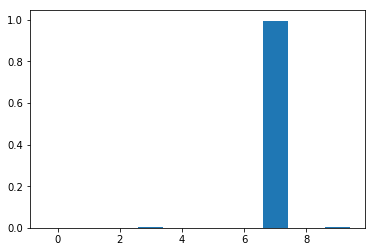

In [22]:
plt.bar(range(10),y_pred[0])

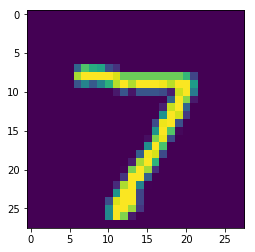

In [24]:
plt.imshow(x_test[0].reshape((28,28)))